In [8]:
import os 
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pokemon Data

In [21]:
mon_df = pd.read_csv('csvs/pokemon_stats_weekly.csv').rename(columns={'index':'Pokemon'}).drop(columns=['Unnamed: 0'])

In [22]:
mon_df.head()

,Pokemon,damage_given,damage_received,damage_healed,toxic_damage_taken,hazard_damage_taken,burn_damage_taken,poison_damage_taken,life_orb_damage_taken,stealth_rock_damage_taken,spike_damage_taken,buff_received,recoil_damage_taken,week,trainer
0,Kabutops,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,sonofringo
1,Infernape,31.0,-81.0,0.0,0.0,0.0,0.0,0.0,-19.0,0.0,0.0,-1.0,0.0,1,sonofringo
2,Garbodor,63.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,sonofringo
3,Skarmory,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,sonofringo
4,Gliscor,0.0,-109.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,sonofringo


### Top 5 for Each Statistic

In [24]:
# Taking averages of each statistic across weeks:
mon_averages = mon_df.groupby(by=['trainer', 'Pokemon']).mean().copy().reset_index()

In [54]:
# Building a list of all statistics
statistics = set(mon_averages.columns[2:-1])

In [56]:
statistics

{'buff_received',
 'burn_damage_taken',
 'damage_given',
 'damage_healed',
 'damage_received',
 'hazard_damage_taken',
 'life_orb_damage_taken',
 'poison_damage_taken',
 'recoil_damage_taken',
 'spike_damage_taken',
 'stealth_rock_damage_taken',
 'toxic_damage_taken'}

In [58]:
for stat in statistics:
    leaders = mon_averages.sort_values(by=[stat], ascending=False).head().copy()
    dropped_stats = statistics.copy()
    dropped_stats.remove(stat)
    leaders = leaders.drop(columns=list(dropped_stats))
    
    leaders.to_csv(f'stats/mon_stats/{stat}_top5.csv', index=False)

### Trainers with dramatic statistics?

In [60]:
mon_df_no_pokemon = mon_df.drop(columns=['Pokemon']).copy()

In [61]:
# Taking averages for each trainer (regardless of mon)
trainer_averages = mon_df_no_pokemon.groupby(by=['trainer']).mean().copy().reset_index()

In [62]:
trainer_averages

,trainer,damage_given,damage_received,damage_healed,toxic_damage_taken,hazard_damage_taken,burn_damage_taken,poison_damage_taken,life_orb_damage_taken,stealth_rock_damage_taken,spike_damage_taken,buff_received,recoil_damage_taken,week
0,6utter,76.166667,-95.407407,21.185185,-0.222222,0.0,-4.111111,0.000000,-0.703704,-9.777778,0.000000,0.129630,-2.981481,5.00
1,bman5422,87.518519,-80.537037,14.388889,-5.611111,0.0,-6.833333,-0.629630,-2.703704,-3.944444,0.000000,0.166667,0.000000,5.00
2,crystopperpkmn,98.812500,-67.604167,17.833333,-4.354167,0.0,-2.083333,-0.500000,-2.000000,-9.395833,0.000000,0.020833,-1.479167,4.75
3,gscalfaro7,65.925926,-84.129630,5.925926,-3.018519,0.0,-2.611111,-0.240741,-2.870370,-6.851852,0.000000,-0.518519,0.000000,5.00
4,jmils9,77.416667,-81.604167,18.604167,0.000000,0.0,-2.333333,0.000000,-1.604167,-2.479167,-0.583333,0.729167,0.000000,4.75
5,joji27,95.000000,-60.187500,5.166667,-1.375000,0.0,-0.770833,-0.541667,-1.791667,-11.270833,-3.729167,-0.437500,0.000000,4.50
6,kaiser cauto,92.259259,-61.722222,25.129630,0.000000,0.0,-2.907407,0.000000,0.000000,-1.666667,0.000000,1.574074,0.000000,5.00
7,mattchumaniac44,98.277778,-69.018519,36.203704,-2.222222,0.0,-2.981481,0.000000,-0.277778,-8.055556,-6.351852,-0.240741,0.000000,5.00
8,moof710,61.925926,-117.000000,37.111111,-5.851852,0.0,-4.722222,-0.666667,0.000000,-4.351852,-0.240741,-0.185185,-0.907407,5.00
9,notabot1234,84.270833,-91.479167,22.333333,0.000000,0.0,-2.812500,0.000000,-0.187500,-1.708333,0.000000,0.458333,-0.145833,4.50


In [63]:
for stat in statistics:
    leaders = trainer_averages.sort_values(by=[stat], ascending=False).head().copy()
    dropped_stats = statistics.copy()
    dropped_stats.remove(stat)
    leaders = leaders.drop(columns=list(dropped_stats))
    
    leaders.to_csv(f'stats/trainer_mon_stats/{stat}_top5.csv', index=False)

### Weekly Statistics (Change over time)

In [64]:
mon_df_no_pokemon_no_trainer = mon_df.drop(columns=['Pokemon', 'trainer']).copy()

In [65]:
mon_df_no_pokemon_no_trainer

,damage_given,damage_received,damage_healed,toxic_damage_taken,hazard_damage_taken,burn_damage_taken,poison_damage_taken,life_orb_damage_taken,stealth_rock_damage_taken,spike_damage_taken,buff_received,recoil_damage_taken,week
0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,31.0,-81.0,0.0,0.0,0.0,0.0,0.0,-19.0,0.0,0.0,-1.0,0.0,1
2,63.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,-109.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,100.0,-51.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.0,0.0,0.0,0.0,9
728,84.0,-126.0,51.0,0.0,0.0,0.0,0.0,0.0,-25.0,0.0,-1.0,0.0,9
729,226.0,-63.0,0.0,0.0,0.0,0.0,0.0,0.0,-37.0,0.0,0.0,0.0,9
730,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [116]:
# Building tables for lineplots

# Damage statistics
damage = pd.melt(mon_df_no_pokemon_no_trainer, id_vars=['week'], value_vars=['damage_given', 'damage_received', 'damage_healed'])

# Status statistics
status = pd.melt(mon_df_no_pokemon_no_trainer, id_vars=['week'], value_vars=['toxic_damage_taken', 'hazard_damage_taken', 'burn_damage_taken', 'poison_damage_taken'])

# Other statistics
other = pd.melt(mon_df_no_pokemon_no_trainer, id_vars=['week'], value_vars=['life_orb_damage_taken', 'stealth_rock_damage_taken', 'spike_damage_taken'])

In [117]:
def clean_variable_names(string):
    return string.split('_damage_taken')[0]

In [118]:
# Making status and other damage graphs more interpretable
status['variable'] = status['variable'].apply(clean_variable_names)
status['damage'] = status['value'].apply(lambda x: -x)

other['variable'] = other['variable'].apply(clean_variable_names)
other['damage'] = other['value'].apply(lambda x: -x)


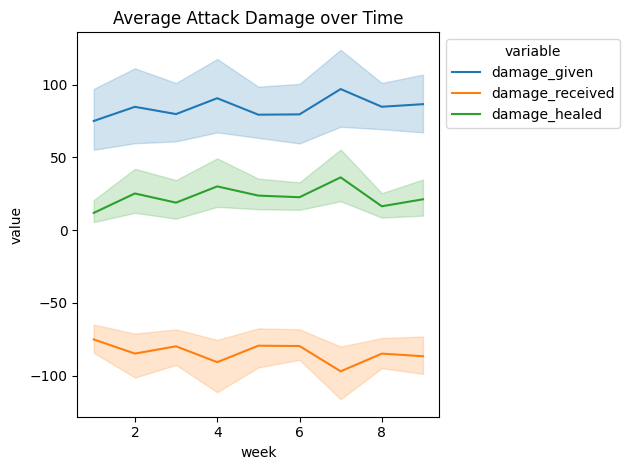

In [119]:
# Damage plot
ax = sns.lineplot(damage, x='week', y='value', hue='variable')
plt.title('Average Attack Damage over Time')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('stats/week_stats/damage.png')

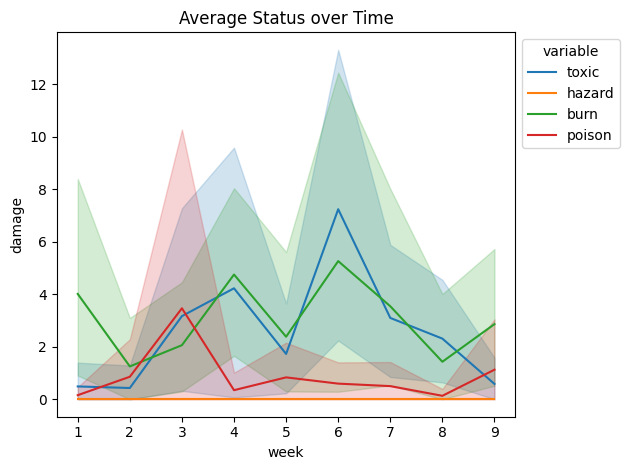

In [120]:
# Status plot
ax = sns.lineplot(status, x='week', y='damage', hue='variable')
plt.title('Average Status over Time')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('stats/week_stats/status.png')

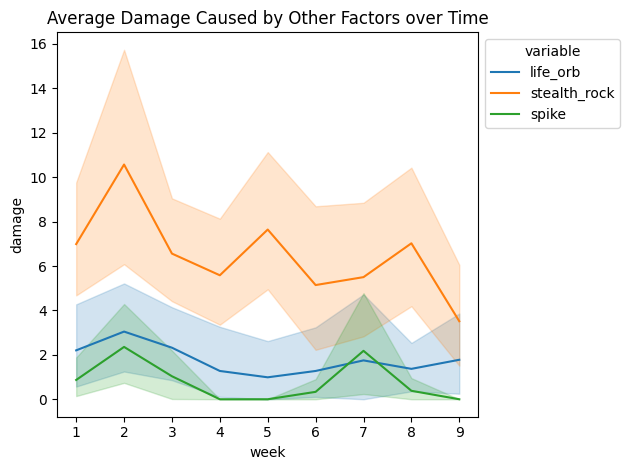

In [121]:
# Other plot
ax = sns.lineplot(other, x='week', y='damage', hue='variable')
plt.title('Average Damage Caused by Other Factors over Time')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('stats/week_stats/other.png')

# Trainer Stats

In [105]:
trainer_df = pd.read_csv('csvs/player_stats.csv').rename(columns={'Unnamed: 0':'trainer'})

In [106]:
trainer_df.head()

,trainer,chat_num,chat_len,joined,male_mons,female_mons,non-binary_mons,average_chat_len
0,6utter,43.0,529.0,0.0,30.0,24.0,0.0,12.302326
1,bman5422,55.0,436.0,0.0,35.0,12.0,7.0,7.927273
2,crystopperpkmn,109.0,1743.0,0.0,17.0,9.0,22.0,15.990826
3,gscalfaro7,2.0,13.0,0.0,11.0,19.0,24.0,6.500000
4,jmils9,78.0,1013.0,0.0,19.0,28.0,1.0,12.987179


In [110]:
trainer_statistics = list(trainer_df.columns)[1:]

In [111]:
for stat in trainer_statistics:
    leaders = trainer_df.sort_values(by=[stat], ascending=False).head(3).copy()
    dropped_stats = trainer_statistics.copy()
    dropped_stats.remove(stat)
    leaders = leaders.drop(columns=list(dropped_stats))
    
    leaders.to_csv(f'stats/trainer_stats/{stat}_top5.csv', index=False)